## Linear-Exponential Adaptation Model 2 Parameter

In [8]:
'''

Purpose of code is to loop through hazard model data and generate LEA-fitted model based on observed h(t)_filtered_0.9 with 2 parameters.

If you would like to change the filtering, in the source file, there is an option for zero filtering. Please utilize the method that yeilds the most
significant and meaningful results.

INPUT: Hazard_Model_Data_1.csv

OUTPUT: Charts, results dataframe.

'''


import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

df = pd.read_csv('Datasets/Hazard_Model_Data_1.csv')

# 2 parameter hazard function


def hazard_model(t, a_m, p):
    return t * a_m * np.exp(-t / p)


# objective function
def objective(params, t, y_observed):
    a_m, p = params
    y_estimated = hazard_model(t, a_m, p)
    return np.sum((y_observed - y_estimated) ** 2)


states = []
mobility_types = []
a_m_values = []
p_values = []
r2_values = []


for (state, mobility_type), group in df.groupby(['state', 'mobility_type']):
    t = np.array(np.arange(len(group['t'])))
    y_observed = group['h(t)_filtered_0.9'].values

    init_params = [0.1, 10]

    res = minimize(objective, init_params, args=(
        t, y_observed), bounds=((0, None), (0.00000001, None)))
    a_m_estimated, p_estimated = res.x

    y_predicted = hazard_model(t, a_m_estimated, p_estimated)

    SSR = np.sum((y_observed - y_predicted) ** 2)
    SST = np.sum((y_observed - np.mean(y_observed)) ** 2)
    R2 = 1 - (SSR / SST)

    '''plt.figure(figsize=(10, 6))
    plt.plot(t, y_observed, 'o-', label='Observed')
    plt.plot(t, hazard_model(t, a_m_estimated, p_estimated),
             'x-', label='Fitted Hazard Model')
    plt.xlabel('t')
    plt.ylabel('h(t)')
    plt.title(f'Observed vs. Fitted Hazard Model for {state}, {mobility_type}')
    plt.legend()
    plt.grid(True)
    plt.show()'''

    states.append(state)
    mobility_types.append(mobility_type)
    a_m_values.append(a_m_estimated)
    p_values.append(p_estimated)
    r2_values.append(R2)

results_df = pd.DataFrame({
    'State': states,
    'Mobility Type': mobility_types,
    'a_m': a_m_values,
    'p': p_values,
    'R^2': r2_values
})

results_df.to_csv("Results/LEA_2.csv")


## Linear-Exponential Adaptation Model 3 Parameter

In [1]:
'''

Purpose of code is to loop through hazard model data and generate LEA-fitted model based on observed h(t)_filtered_0.9 with 3 parameters.

If you would like to change the filtering, in the source file, there is an option for zero filtering. Please utilize the method that yeilds the most
significant and meaningful results.

INPUT: Hazard_Model_Data_1.csv

OUTPUT: Charts, results dataframe.

'''

import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('Datasets/Hazard_Model_Data_1.csv')

# Define the custom hazard function


def hazard_model(t, a, s, p):
    return a * t * np.exp(- (t / p)**s * (1/s))

# Objective function for fitting


def objective(params, t, y_observed):
    a, s, p = params
    y_estimated = hazard_model(t, a, s, p)
    return np.sum((y_observed - y_estimated) ** 2)


# Initialize empty lists to store results
states = []
mobility_types = []
a_values = []
p_values = []
s_values = []
r2_values = []

# Loop over unique combinations of state and mobility_type
for (state, mobility_type), group in df.groupby(['state', 'mobility_type']):
    t = np.array(np.arange(len(group['t'])))
    y_observed = group['h(t)_filtered_0.9'].values

    # Initial guesses for a, s, and p
    init_params = [y_observed[0], 1, t[np.argmax(y_observed)]]

    # Perform optimization to fit the custom hazard model
    res = minimize(objective, init_params, args=(t, y_observed),
                   bounds=((0, None), (0.1, 26.98240641), (0.00000001, None)))  # Note: upper bound for s is determined by top 5% of s
    a_estimated, s_estimated, p_estimated = res.x

    y_predicted = hazard_model(t, a_estimated, s_estimated, p_estimated)

    # Calculate R^2
    SSR = np.sum((y_observed - y_predicted) ** 2)
    SST = np.sum((y_observed - np.mean(y_observed)) ** 2)
    R2 = 1 - (SSR / SST)

    # Plot the observed data and the fitted hazard model curve
    '''plt.figure(figsize=(10, 6))
    plt.plot(t, y_observed, 'o-', label='Observed')
    plt.plot(t, hazard_model(t, a_estimated, s_estimated,
             p_estimated), 'x-', label='Fitted Hazard Model')
    plt.axvline(p_estimated, color='r', linestyle='--',
                label=f'Peak at t={p_estimated:.5f}')
    plt.xlabel('t')
    plt.ylabel('h(t)')
    plt.title(f'Observed vs. Fitted Hazard Model for {state}, {mobility_type}')
    plt.legend()
    plt.grid(True)

    # Display values of a, s, p, and R^2
    plt.text(0.7 * t[-1], 0.7 * max(y_observed), f'a = {a_estimated:.5f}\ns = {s_estimated:.5f}\np = {p_estimated:.5f}\nR^2 = {R2:.5f}',
             fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    plt.show()'''

    states.append(state)
    mobility_types.append(mobility_type)
    a_values.append(a_estimated)
    p_values.append(p_estimated)
    s_values.append(s_estimated)
    r2_values.append(R2)

# Compile results into a dataframe
results_df = pd.DataFrame({
    'State': states,
    'Mobility Type': mobility_types,
    'a': a_values,
    'p': p_values,
    's': s_values,
    'R^2': r2_values
})

results_df.to_csv("Results/LEA_3.csv")


## LEA 3 Detailed Results Output

In [10]:
'''

Purpose of code is to export a detailed profile of h(t) fit by the LEA model. 

'''


import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('Datasets/Hazard_Model_Data_1.csv')

# Define the custom hazard function


def hazard_model(t, a, s, p):
    return a * t * np.exp(- (t / p)**s * (1/s))

# Objective function for fitting


def objective(params, t, y_observed):
    a, s, p = params
    y_estimated = hazard_model(t, a, s, p)
    return np.sum((y_observed - y_estimated) ** 2)


# Lists to store results for the detailed dataframe
detailed_states = []
detailed_mobility_types = []
detailed_t = []
detailed_observed = []
detailed_fitted = []

# Loop over unique combinations of state and mobility_type
for (state, mobility_type), group in df.groupby(['state', 'mobility_type']):
    t = np.array(np.arange(len(group['t'])))
    y_observed = group['h(t)_filtered_0.9'].values

    # Initial guesses for a, s, and p
    init_params = [y_observed[0], 1, t[np.argmax(y_observed)]]

    # Perform optimization to fit the custom hazard model
    res = minimize(objective, init_params, args=(t, y_observed),
                   bounds=((0, None), (0.1, 26.98240641), (0.00000001, None)))  # Note: upper bund for s is determined by top 5% of s
    a_estimated, s_estimated, p_estimated = res.x

    y_predicted = hazard_model(t, a_estimated, s_estimated, p_estimated)

    # Append results to detailed lists
    detailed_states.extend([state] * len(t))
    detailed_mobility_types.extend([mobility_type] * len(t))
    detailed_t.extend(t)
    detailed_observed.extend(y_observed)
    detailed_fitted.extend(y_predicted)

# Compile the detailed results into a dataframe
detailed_df = pd.DataFrame({
    'State': detailed_states,
    'Mobility Type': detailed_mobility_types,
    't': detailed_t,
    'Observed h(t)': detailed_observed,
    'Fitted h(t)': detailed_fitted
})

detailed_df.to_csv('Results/fitted_hazard_detailed.csv')


## Weibull

In [7]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('Datasets/Hazard_Model_Data_1.csv')

# Define the Weibull function


def weibull(t, A, B):
    return B / A * (t / A) ** (B - 1)

# Define the objective function for fitting


def objective(params, t, y_observed):
    A, B = params
    y_estimated = weibull(t, A, B)
    return np.sum((y_observed - y_estimated) ** 2)


# Create an empty dataframe to store results
results_df = pd.DataFrame(columns=['state', 'mobility_type', 'A', 'B', 'R2'])

# Loop over unique combinations of state and mobility_type
for (state, mobility_type), group in df.groupby(['state', 'mobility_type']):

    t = np.array(np.arange(len(group['t'])))
    y_observed = group['h(t)_filtered_0.9'].values

    # Initial guesses for A and B
    init_params = [1, 1]

    # Perform optimization to fit the Weibull distribution
    res = minimize(objective, init_params, args=(t, y_observed))
    A_estimated, B_estimated = res.x

    y_predicted = weibull(t, A_estimated, B_estimated)

    # Calculate R^2
    SSR = np.sum((y_observed - y_predicted) ** 2)
    SST = np.sum((y_observed - np.mean(y_observed)) ** 2)
    R2 = 1 - (SSR / SST)

    # Add results to dataframe
    results_df = results_df.append({'state': state, 'mobility_type': mobility_type,
                                   'A': A_estimated, 'B': B_estimated, 'R2': R2}, ignore_index=True)

    # Plot the observed data and the fitted Weibull curve
    '''plt.figure(figsize=(10, 6))
    plt.plot(t, y_observed, 'o-', label='Observed')
    plt.plot(t, weibull(t, A_estimated, B_estimated), 'x-', label='Fitted Weibull')
    plt.xlabel('t')
    plt.ylabel('h(t)')
    plt.title(f'Observed vs. Fitted Weibull Distribution for {state}, {mobility_type}')
    plt.legend()
    plt.grid(True)
    plt.show()'''

# Display the results
print(results_df)
results_df.to_csv('Results/fitted_weibull.csv')


       state                                      mobility_type           A  \
0    Alabama  grocery_and_pharmacy_percent_change_from_baseline   28.841722   
1    Alabama                 parks_percent_change_from_baseline   67.140957   
2    Alabama           residential_percent_change_from_baseline   28.618653   
3    Alabama  retail_and_recreation_percent_change_from_base...   52.439109   
4    Alabama      transit_stations_percent_change_from_baseline   54.717666   
..       ...                                                ...         ...   
307  Wyoming                 parks_percent_change_from_baseline   54.560914   
308  Wyoming           residential_percent_change_from_baseline   28.164201   
309  Wyoming  retail_and_recreation_percent_change_from_base...   33.017786   
310  Wyoming      transit_stations_percent_change_from_baseline   42.401589   
311  Wyoming            workplaces_percent_change_from_baseline  109.767107   

            B        R2  
0    1.249202  0.318761  

In [20]:
import pandas as pd

# Load the dataset with the correct header
df = pd.read_csv('Datasets/nhgis0010_ds244_20195_2019_state.csv',
                 encoding='ISO-8859-1', header=1)

# Filter columns that contain 'State Name' or 'Estimate'
filtered_columns = [
    col for col in df if 'State Name' in col or 'Estimate' in col]
filtered_df = df[['State Name'] + filtered_columns]

# Display the first few rows of the filtered dataframe
# Remove the first two 'State Name' columns
filtered_df = filtered_df.drop(filtered_df.columns[[0, 1]], axis=1)

# Display the first few rows of the modified dataframe

filtered_df.to_csv('Datasets/cleaned_nhgis_data.csv')
filtered_df.head()


,Estimates: Area Name,Estimates: Total,Estimates: Male,Estimates: Male: Under 5 years,Estimates: Male: 5 to 9 years,Estimates: Male: 10 to 14 years,Estimates: Male: 15 to 17 years,Estimates: Male: 18 and 19 years,Estimates: Male: 20 years,Estimates: Male: 21 years,...,Estimates: 65 years and over: With one type of health insurance coverage: With VA Health Care only,Estimates: 65 years and over: With two or more types of health insurance coverage,Estimates: 65 years and over: With two or more types of health insurance coverage: With employer-based and direct-purchase coverage,Estimates: 65 years and over: With two or more types of health insurance coverage: With employer-based and Medicare coverage,Estimates: 65 years and over: With two or more types of health insurance coverage: With direct-purchase and Medicare coverage,Estimates: 65 years and over: With two or more types of health insurance coverage: With Medicare and Medicaid/means-tested public coverage,Estimates: 65 years and over: With two or more types of health insurance coverage: Other private only combinations,Estimates: 65 years and over: With two or more types of health insurance coverage: Other public only combinations,Estimates: 65 years and over: With two or more types of health insurance coverage: Other coverage combinations,Estimates: 65 years and over: No health insurance coverage
0,Alabama,4876250,2359355,149090,153494,158617,98257,64980,35870,35040,...,469,556059,473,146211,143044,59733,105,17885,188608,2892
1,Alaska,737068,384915,27062,26776,25921,15200,9746,6154,6029,...,81,58922,114,22763,6211,8492,96,3066,18180,780
2,Arizona,7050299,3504509,221817,228224,241782,142358,99160,53415,52100,...,972,760054,1523,169353,235732,88260,67,39668,225451,10060
3,Arkansas,2999370,1471760,96986,100270,101442,61421,41658,23070,21553,...,394,329324,86,59773,105789,39320,13,19425,104918,2313
4,California,39283497,19526298,1254607,1257974,1318355,779960,529837,295438,285103,...,4245,3461873,6371,977119,766214,846380,863,106623,758303,58120


162.52867921530515
72.00960721458485
121.15456405404545
162.52956778825614
72.062196199009
121.32655329061697
162.2501639869218
71.5507723076926
121.92521822879165
162.2034401454219
71.52264413364898
122.07236737813486
162.25269352519604
71.57078297809551
121.99224651415773
162.35903979826406
71.65822711699434
121.90905856943341
162.36774278241214
71.58362174368278
122.15277097123321
162.3475171191936
71.80762278704029
122.1109901263667
162.3732566099762
71.76025313241175
122.2805912422569
162.46625951403075
71.93632424293254
122.15881475204884
162.4920352844266
72.09072226149718
122.39334272928
162.51499405635826
72.10282418073915
122.25140972632941
162.50688528639182
72.04636055804535
122.06190605869855
162.46883254139925
71.8873065047553
121.72060788373169
162.53956154757114
72.09123910618761
121.54738154691911
162.49620320100212
72.28711998445266
120.93498143365132
162.51420985626436
72.39219951658886
120.679402210071
162.545042211289
72.50237161599516
120.42603362691197
162.484769

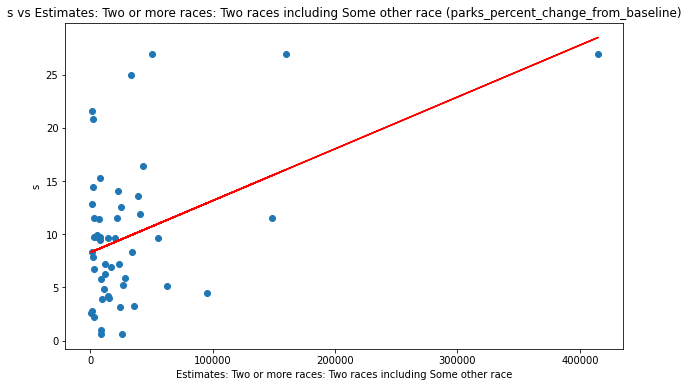

74.352845572337
37.2700609772626
133.36917933554844
71.88702752321493
37.041484401701325
134.07759519734785
72.49138313320267
37.015879984596424
138.0118987234079
72.86859136553554
37.19380167493543
140.2343914845588
72.68695968244907
36.23782591875171
134.49855310644114
73.2034293145827
36.30430121409786
128.75207595124425
75.23272906234307
37.33107257695042
126.6303169678767
77.46627000739494
36.76386758873912
133.78447638508817
71.45750255705144
37.09595163137937
133.60192101618182
74.65968943099716
37.291524179865036
134.99997445097776
72.2292504126282
37.22268114685008
130.0125797096955
74.81400741450736
37.29074442824988
135.30335449381593
72.3198034022013
36.85718161900133
122.74579672757604


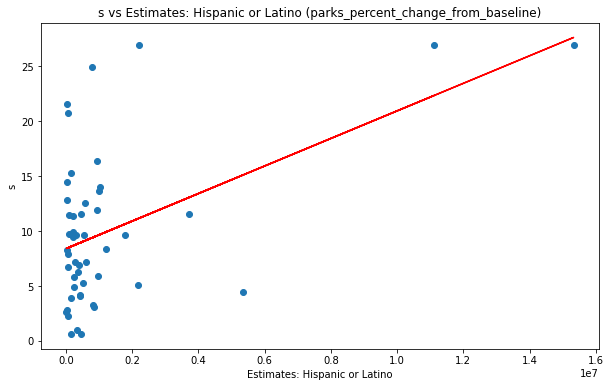

72.09221028162257
36.883422075624324
123.19077948663839


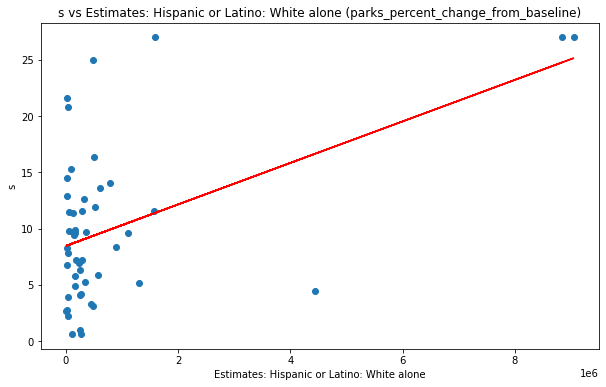

71.55236011432527
36.7168428816698
132.69116936524864
72.70578605840694
37.14332902606852
120.35144370869138


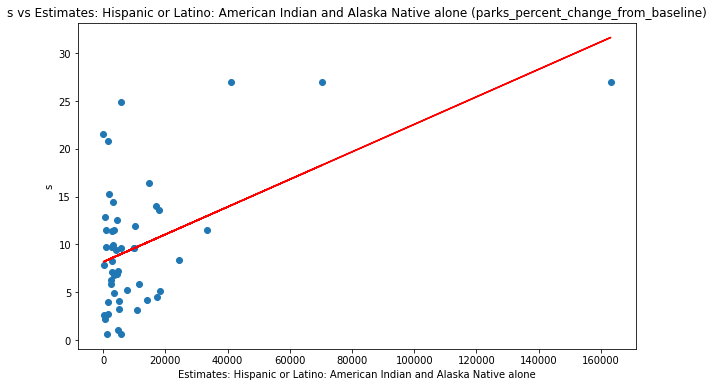

75.31851118934513
37.222462396348654
126.4068520530438
76.18784939447892
36.46614778062749
132.07365857913436
74.45324778296023
37.26082756888327
124.5663025296867


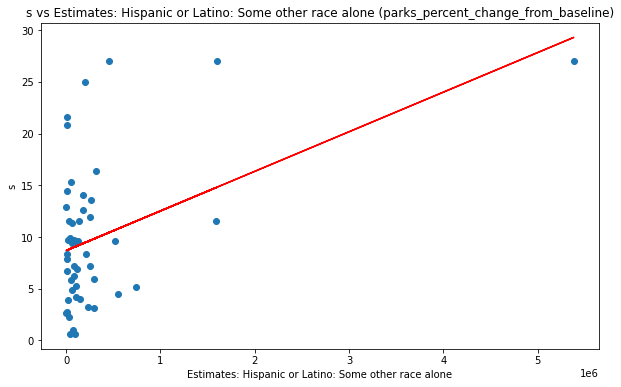

73.11736853549642
37.1775872026201
125.41674583158536


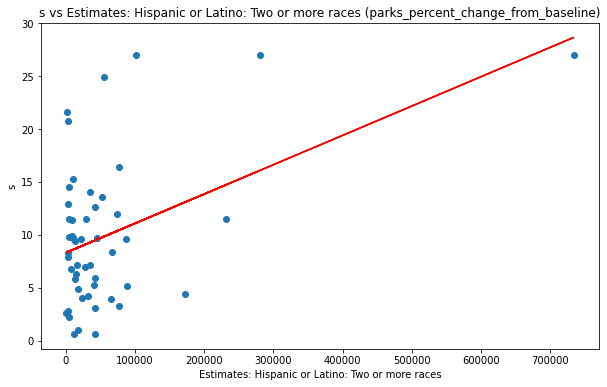

73.41881539282878
37.24151089399494
124.43372261443545


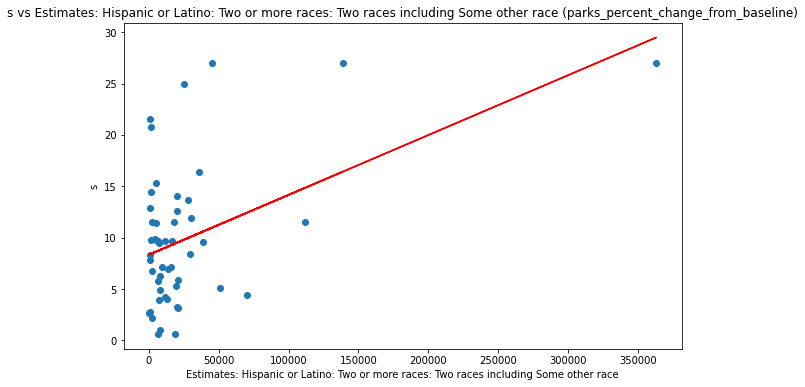

72.87357554627138
37.035094734587794
126.46592583531553
71.88702752321493
37.041484401701325
134.07759519734785
72.49138313320267
37.015879984596424
138.0118987234079
72.3198034022013
36.85718161900133
122.74579672757604


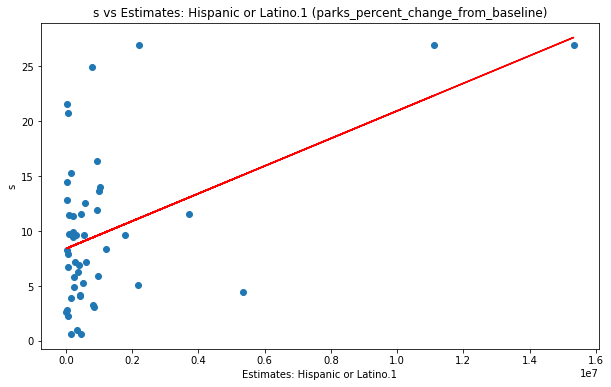

72.19581279557701
37.070047853995405
134.10186925179502
72.32935436806656
36.953861419376196
135.00010926673127
72.30065082644376
36.948108228380796
135.4060605361728
72.61349425304186
36.991710374598426
131.39816144138126
72.59312512129445
36.98417394890821
132.07892495170918
72.67189378925016
36.986943082485986
129.4890190619385


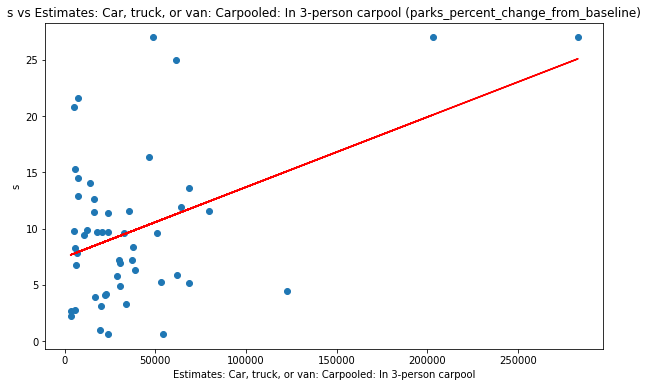

72.71718196051589
36.97216088907757
128.5579563258851
72.8288910217247
37.02391356248484
130.2254041423178


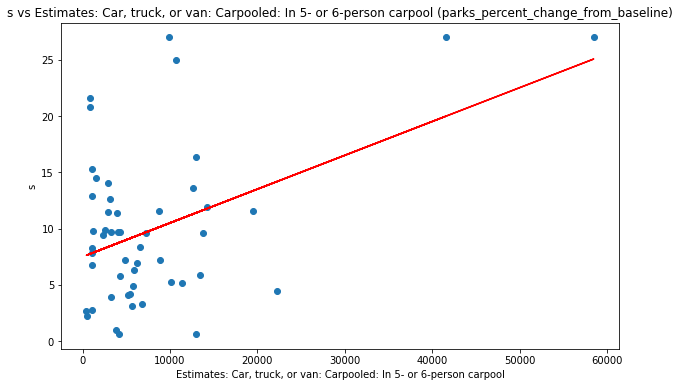

72.99358678074526
37.206831560827204
131.00987153442424
75.60728804301385
37.52627559741431
133.52657340379565
73.88101541092618
37.5850813600887
130.64586568640692
76.58537136647084
37.34689218548945
134.95124608896705
74.42989511907592
37.518158646898065
133.984823746963
73.61198302697372
37.36622681024207
126.79921345859168
74.42838578192533
37.32978267090675
129.6920217957292
73.85180345860823
37.35520103711657
133.19921377713405
74.46055519207376
37.173344892393004
127.44061179227228
74.83502782653039
37.46622347270943
129.61415984099273
74.55909241556006
37.33536102143227
133.59951614805527
70.7292228773324
36.68764499864866
131.96410502567412
72.39539471322843
37.15982060857812
130.3939330753542
72.19744552856184
37.06809550260561
134.30781328171977
74.3812115639831
37.29557558826915
140.75482139445884
73.62372141331748
37.18122018895748
138.12388523504956
72.86870390168325
36.957411301210584
136.11086295756186
72.47683680270978
36.94931407185273
135.677500705898
71.807808210324

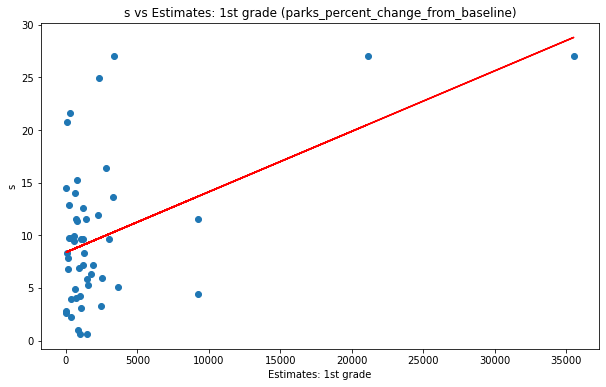

73.98642010482763
37.03674865320722
124.17075381341272


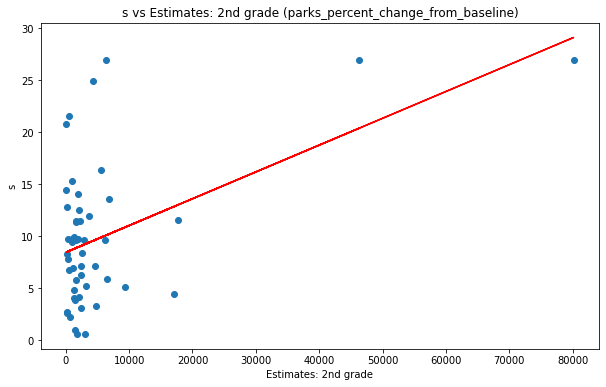

73.58805634856874
36.976430225004606
123.92550172096637


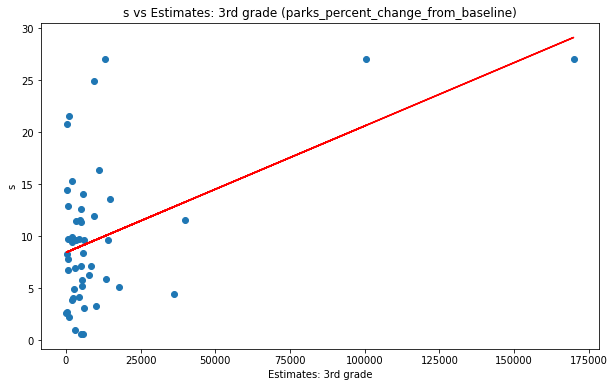

72.54128565858213
36.96046276677926
125.1033136162512


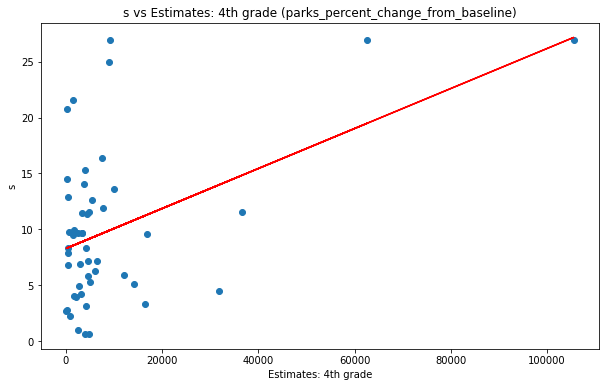

72.26889045625323
36.99751251230852
125.11639898981855


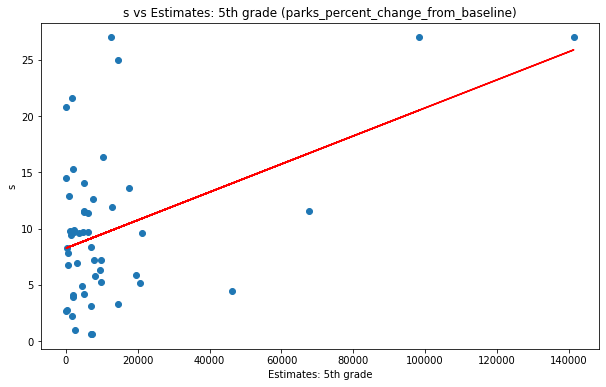

73.70516160867966
37.032968054814106
123.48711798913293


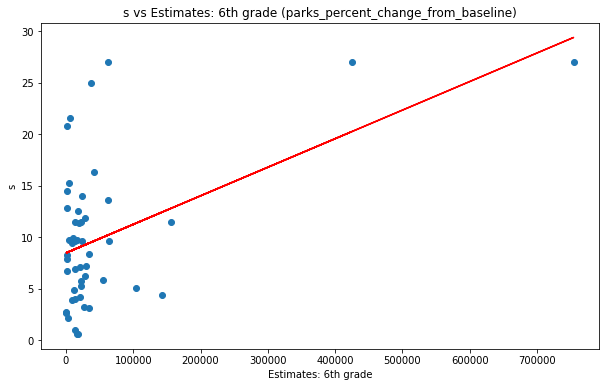

70.91184842458046
36.93501650090536
128.97755590961665


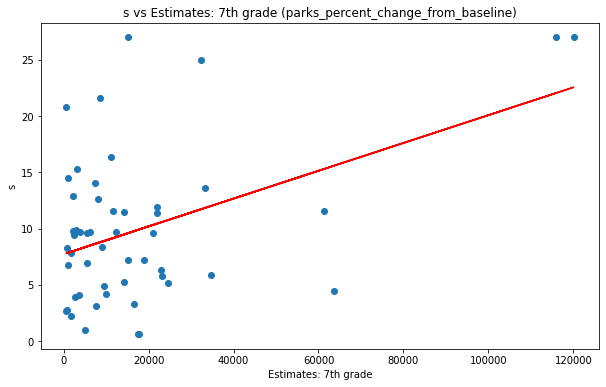

70.58638688691484
36.98033448235892
139.00083776046293
71.60080242395509
36.87780527549656
130.15198791864194


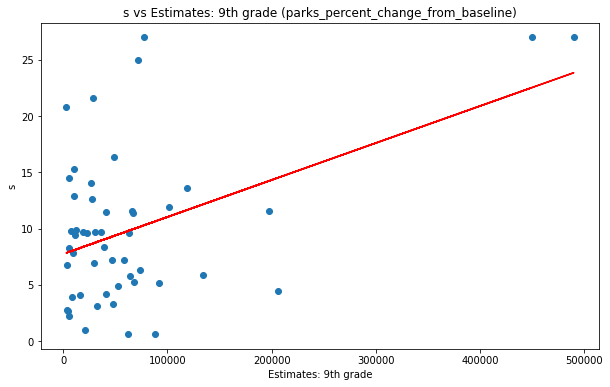

70.30585370987336
36.57475039004167
137.22545082850303
70.63024455445594
36.784340862448964
136.65626862019474
72.10423312348024
37.142445378109784
131.79173170378826
71.17953348423589
36.83270981761821
138.41083010641
70.63807910459953
36.60957634378026
137.05887444227326
72.60519001798559
36.974010485568485
136.49833955659818
72.44077560354934
37.006116426233106
133.211846685531
72.89035572494163
37.07927519831208
134.98302204026453
72.26793702075447
37.18037848971681
132.13599125212733
72.30711023994725
37.25355781122573
133.2805552764409
72.43697862040194
37.29499651453061
132.69380688817753
73.05077786289988
37.183628491220446
131.16928485309367
71.89697675175015
37.04286463860221
133.9795197452375
70.88487851698817
36.90207985102625
135.32555761531495
71.03308316299955
36.84325646458359
135.09140197334372
71.26011180730927
36.79990940671557
133.74601888665788
71.31326032235525
36.78977946573033
133.7705887911011
71.508469515402
36.82624964813628
134.12463499462487
71.318628872578

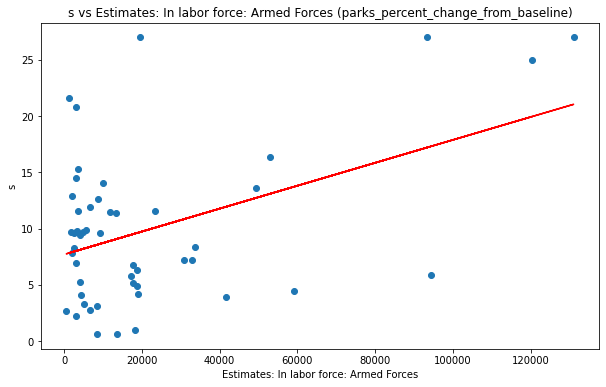

71.31388622146667
36.96409260371013
134.71742170547407
72.20516309944146
37.0739270920248
134.1383747807643
72.22869805878477
37.069129473588006
133.70695706678876
72.69103792336671
37.1724147063113
132.5505349800548
72.24584339407775
37.13365625227556
133.13845241542475
72.28997341143203
37.11315331824461
133.12343279011344
72.16937159521011
37.176467151869204
133.1793984250665
73.94609762615345
37.162514996561114
131.02437219217353
73.94884017323842
37.23446559397456
129.9471368966523
73.97876320650715
37.06610232992783
132.69054177204268
74.21895704769207
37.04851037271803
131.1127371549792
72.85608018618963
37.26845795690333
132.05939745781112
72.64235021382024
37.11919690184925
134.56732943695727
72.3665198866971
37.33426078260207
133.1165237806655
72.65079714803522
37.13481902686567
132.85474064461417
73.5957740060229
37.36244197432661
130.1887336025282
71.68274970538123
37.06865941589494
134.86451714728884
71.8827042336022
37.08256686465964
135.503452322958
71.2932633794232
37.0

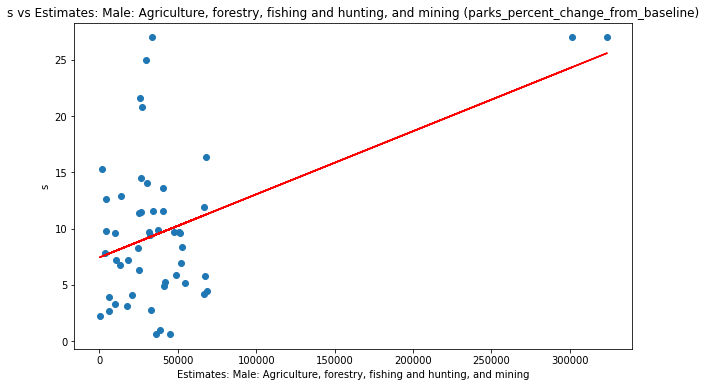

76.98413790020324
37.286924930195084
129.9368065386356
73.70291276157079
37.168779687447085
132.1866580250325
71.73136014906082
36.855956403087816
130.56631401448533
76.12686623249668
37.25748552164946
140.79741166458163
71.9078915555081
37.001518512586564
133.83513301342867
71.62759995350638
36.986823383624646
133.81270960920946
71.15613885052969
37.03086086748189
133.9157144461194
71.30784771989558
37.06802192344329
133.84955476547393
70.53012979544982
36.763992552082016
134.4041602351203
72.78266508944526
37.3493806384561
129.44726593634707
70.97506365569998
37.110391571018056
133.6990113896855
70.89044930535374
37.095095662327346
134.92781465453743
71.42657328912102
37.042344045682
131.57526108923093
72.18721932875178
37.19046481978708
130.65660128284415
72.8271908002863
37.30914626220254
129.5457948181362
71.79294186059596
36.95690356862414
136.4114244270797
71.23315873412905
36.86532318893558
132.3723927277318
72.51890847576657
37.162318263018335
134.15518091170577
72.69778772306

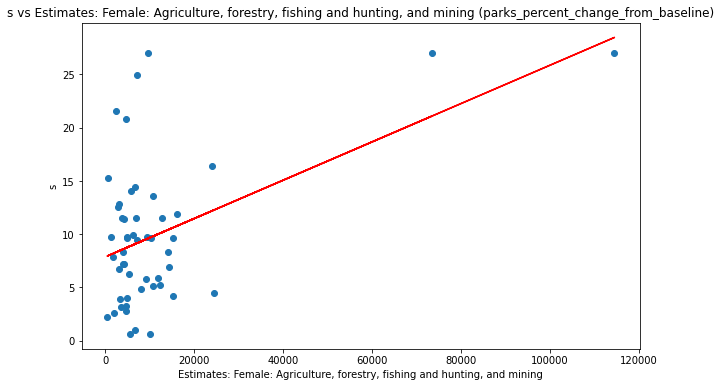

76.48792517355223
37.151888032249765
127.8745191436904
74.42848229227495
37.10990132127929
131.19475640308917
71.48885336771136
36.83489295769658
131.45737034308286
75.85781431057507
37.28858437089814
138.74113320021863
71.8391806417802
37.09710726155857
133.02039439939745
71.57114399818285
36.95367435444045
135.37230555782065
71.20241990013858
36.99328779324034
133.8499600784267
71.24537563097847
37.01322101796442
133.94135200799033
71.37049698815588
36.83623757637646
133.15462767061993
72.84400636241703
37.36767478038614
132.09484286702
71.15227919194015
36.91044202481722
134.38281587436762
71.27742906399665
36.91540389332358
135.87415449426928
71.25359583431695
36.78434435067881
130.91378589793405
71.96247685437038
37.155429366363116
131.80505785767042
72.70451910227077
37.30228077418996
130.85669505201585
72.36818176073947
36.95257507763104
135.70266127978525
70.63465842480866
36.676688804523124
133.53983591038693
72.34482011183958
37.06371824758267
135.65982068633085
72.0261140118

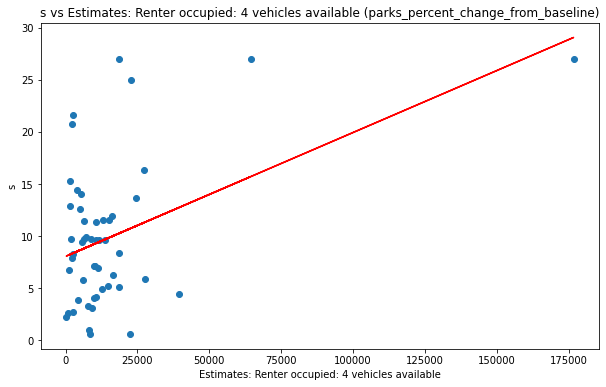

75.80846767989621
37.24533712437569
130.30187179868986
77.10369999804374
35.38011331820654
134.4000613330934
72.30532224915164
32.84082112339178
131.66458515764924
72.0342192940742
37.17737061999878
134.17633173062222
70.7396850052269
36.966967099018866
139.41578625522382
73.14792707399005
37.32218636592918
142.5938905510713
72.09629874396146
37.23372466894217
141.1841905965802
73.14111829680996
37.3029988338612
138.74272074084635
73.44489016282988
37.36697928662422
137.55173442798792
71.06192073727358
37.18357302734125
138.19526436875373
71.58985900120943
37.30732556869357
140.39123326241798
71.36775979697651
37.03025838631116
139.06735038721237
69.68992752431781
36.72531610740305
137.22570581617538
72.01043840383392
37.103150111621304
137.5116584748198
73.26588844351247
37.27520085377185
140.1711473664593
73.96455459097578
37.21869914758174
137.87409054266539
74.29777308064062
37.217690371641346
138.48621963214148
73.76889535021598
37.1626394964738
138.9695816129525
73.71950793239276

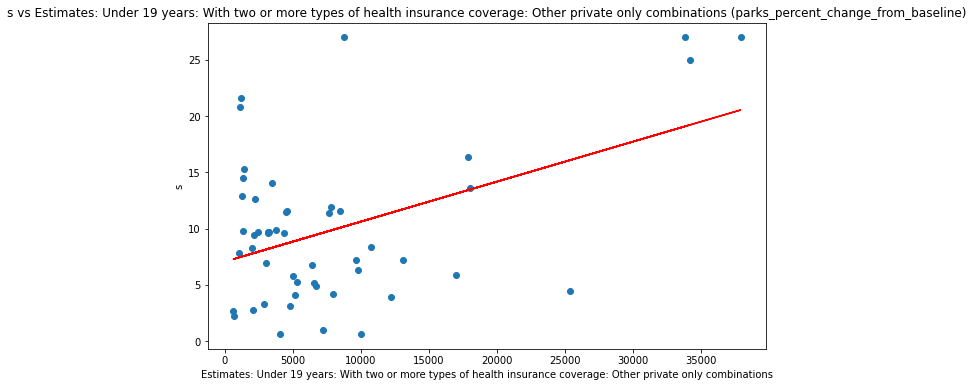

77.10237894622529
37.30387023568322
135.69811892251028
73.20402449796899
37.06207731632279
136.0401042060672
72.34684140627196
36.825373660035545
130.47476627649107
72.16588643003644
37.0850173119617
133.14833551340786
72.80039973659163
37.17965922845094
134.35351687979008
72.66710679102619
37.09946033318965
134.39782335985967
72.53472589345182
36.98647028639775
130.9177915814534
72.12683868442625
37.16108199386214
137.391889545575
73.91614319849263
37.2036360040546
136.44425736204653
74.18349335548997
36.863770161532976
129.92031304143035


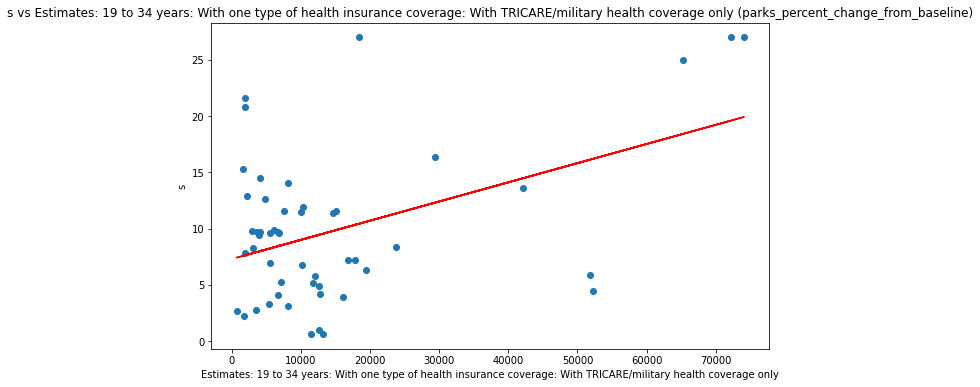

71.94656918280488
36.77781376544001
131.1833445980756
72.89635779726407
37.1305239379157
133.759120652861
73.20992016638941
37.0921382748378
133.04050940697357
73.7099129539169
37.02717601866664
135.89265320482977
72.48548666117692
36.966024316035266
137.52912696701256
74.27292388250684
36.84543072586836
131.74381665538385


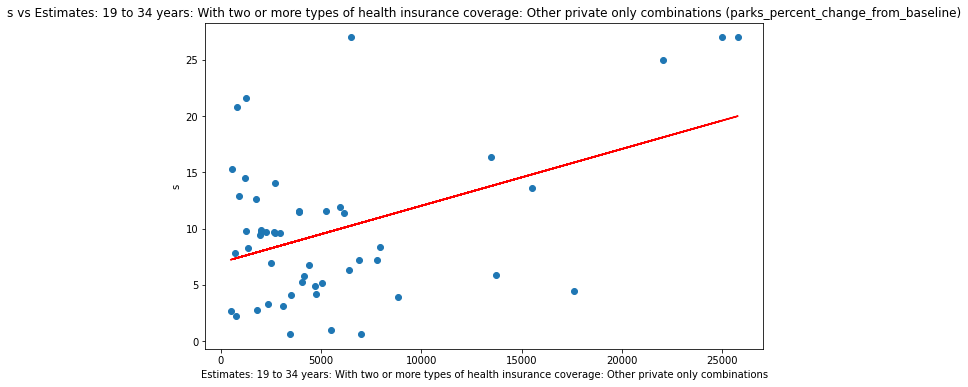

73.68412689791997
37.32753915565935
135.93804394690727
72.94462240939389
37.14731291909993
133.89218242438116
71.36674496136537
36.67714735883257
128.28893843531262
71.95948498572149
37.063160543281896
134.25122352305456
72.45025671174261
37.14077615069103
135.11294550901982
72.50524863914653
37.08494480926639
135.3498325108818
72.31811254457968
36.78568720683557
131.04170134947316
69.71770646392798
36.52543887929702
141.29855924034405
73.80702846276525
37.23375560876507
136.7255941449078
73.85536268175234
36.659140372247336
130.37373048161936
71.63906430229626
36.43804843346392
136.16469416802448
72.13456863288724
36.973466556787194
135.2125795655226
72.57787511162647
37.069528406625885
133.86639050455616
73.7797639158324
37.17739987157702
139.72730922381112
74.45862604055847
37.18606499987126
138.98868417259035
72.08625505315254
36.89764855038955
137.5043303874222
74.88285806718751
36.894002744632566
128.00191924876697
72.20661017749235
36.88077481800843
140.7234332832129
71.78780359

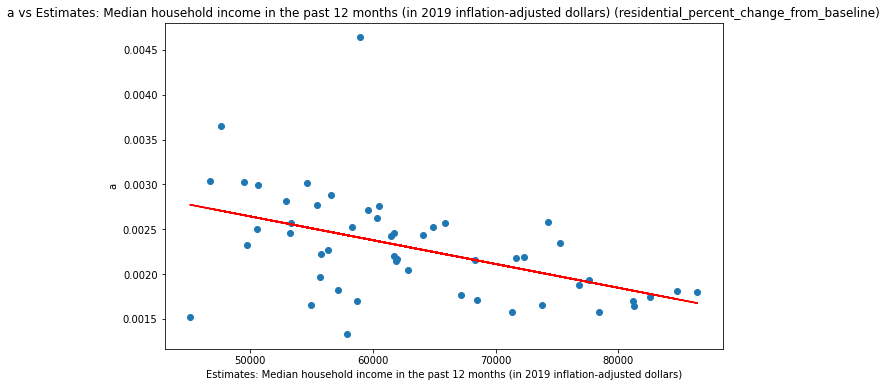

5.7637316301939325


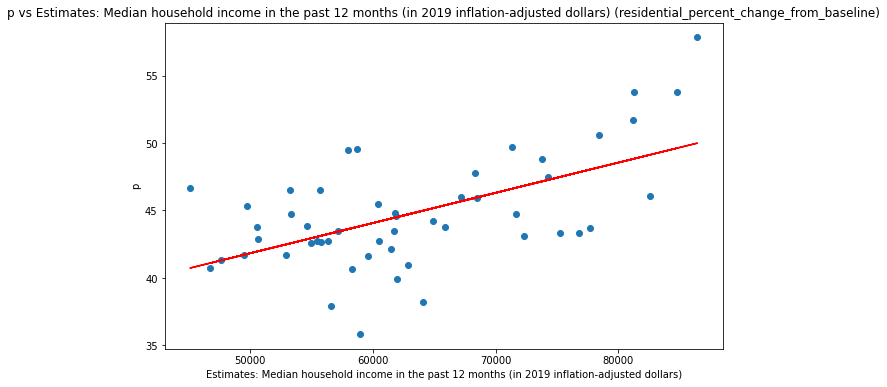

25.293555419961056
17.61125863006204


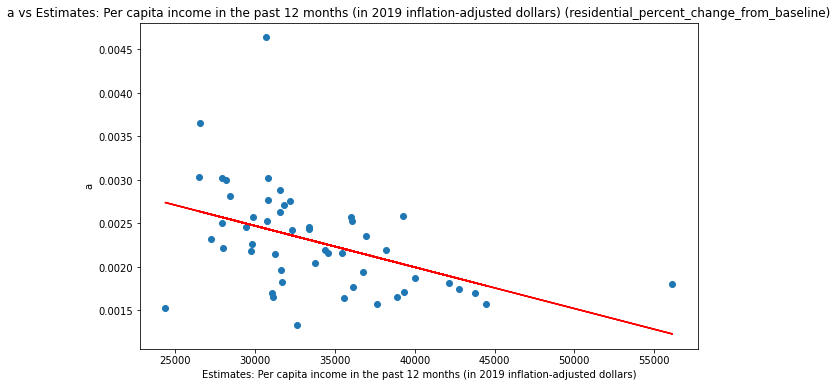

5.6489796198605315


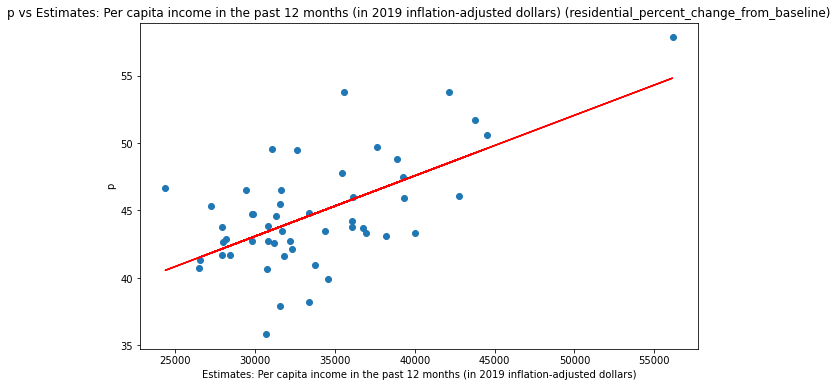

25.0097841813485
20.703348936322786
6.810830133727595
25.095411204696376
20.70281039285745
6.810992812865295
25.075784552698927
20.702189504537728
6.810856291892053
25.075055597232577
20.701486513032563
6.810933817484209
25.07158530175285
20.707608222272817
6.80889018731043
25.141524104478002
20.620646839230407
6.727611957688275
25.62777093282213
20.69660518104533
6.825254892653844
25.125261686851196
20.701486513032563
6.810933817484209
25.07158530175285
20.703140476747947
6.809431945550762
25.126363711631015
20.672690633473515
6.809358777402617
25.07568338013298
20.670270609562706
6.809615547456488
25.05594320755604
20.683133694255044
6.811382691331544
25.103739198210622
20.634533501731983
6.799722578092624
24.900569834378715
20.67484069393958
6.812049476404311
25.10986650748519
20.666252582296273
6.793226623274677
25.00729785852104
20.69429201767525
6.804688183703245
25.216728889500672
20.64947323254011
6.806472009181623
25.11067060519056
20.67433040145363
6.805625314451616
24.993936

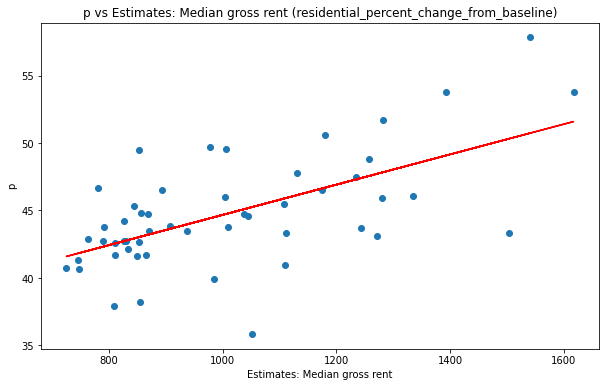

24.7603415239638
18.945901837409306
6.2235760793412895
25.283896112175324
20.709193906270425
6.8115687113217405
25.029606938063658
20.690630706810914
6.842629621384441
24.54801428490643
20.650735152447023
6.819282777653448
24.092152036236
20.681348815135692
6.811185253305842
24.47442546656467
20.67530823693115
6.817463268073317
24.324597023765453
20.467847361305385
6.8028919941013495
24.458084406000488
20.47168357263904
6.792857427652363
25.15850819977453
20.69895412501309
6.816816960766903
24.939581219186437
20.69433401343768
6.842734760973474
24.457335436055608
20.710203510619117
6.846025127429312
25.195443630549473
20.693927765448542
6.833200369515992
24.839335598451946
20.683155363058628
6.810381225402928
23.917920405933334
20.638402670528443
6.80413876908171
23.97954738318446
20.691078257726677
6.807740257170088
24.316726157766748
20.731504526439096
6.812335162378806
24.54038105637425
20.56613506562176
6.8192031145405325
24.449907366410812
20.355341182715318
6.835063520783863
24.8

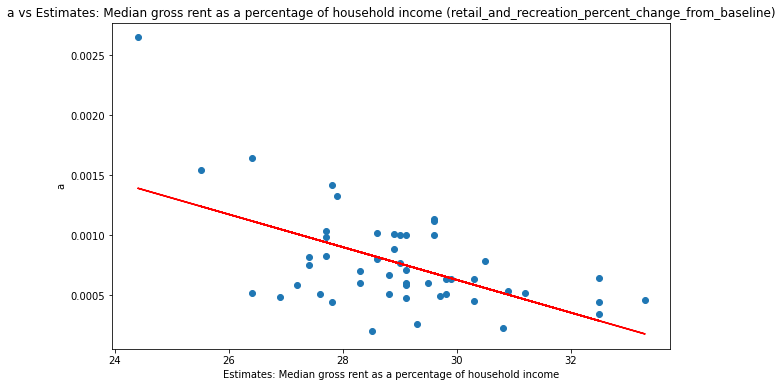

28.548512569018914
124.06446112069742
46.120716985445625
28.004554436089034
119.3899625736604
46.03786173302697
28.175672060714298
115.67014790285648
45.57715562725126
28.458641041163606
113.11703028807133
45.357410783757146
28.308631486498765
113.78377733181935
45.46268824109576
28.485373109407302
113.93126401163258
46.32123156958064
28.49529126332863
115.21571230101053
46.952089877072446
28.418878307262542
119.57165289534191
46.7587439549068
28.22872940883855
118.56743564955879
46.07030664580435
28.220275840208785
115.21278119110983
46.14369538978355
27.949573904138937
119.20024473211048
46.23680989743825
28.13516766149896
117.3931627683664
45.995593658265534
28.436258394015095
113.33432439074092
46.251433815462434
28.501941756743353
115.53237848186919
46.45930038762808
28.485815303664047
114.76340930777233
46.460355810405076
28.419259521859825
116.52181183448285
46.29424489175427
28.115565028155288
114.71540968481469
46.82733368548697
28.04848637301528
115.22534523404036
45.99670406

In [62]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Load the data
df1 = pd.read_csv('Datasets/cleaned_nhgis_data.csv')

df2 = pd.read_csv('Results/LEA_3.csv')
df2 = df2[df2['State'] != "United States"]


def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define a function to run the regression and plot the results


def run_regression_and_plot(df1, df2, mobility_type, X_column, y_columns, results_list):
    # Filter the data for the specified mobility type
    df2_filtered = df2[df2['Mobility Type'] == mobility_type]

    # Merge the dataframes on the 'State' column
    df = pd.merge(df1, df2_filtered,
                  left_on='Estimates: Area Name', right_on='State')

    # Drop the columns that you don't need
    df = df.drop(columns=['State', 'Mobility Type'])

    # Add a constant to X
    X = sm.add_constant(df[[X_column]])

    # Loop through each target variable and run the regression
    for y_col in y_columns:
        y = df[y_col]
        model = sm.OLS(y, X)
        results = model.fit()
        # print(results.summary())

        y_pred = results.predict(X)
        mape = mean_absolute_percentage_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        results_list.append([mobility_type, X_column, y_col, mape, mae, r2])

        # Plot the results
        print('Mobility Type')
        if (mobility_type == "0.2"):
            plt.figure(figsize=(10, 6))
            plt.scatter(df[X_column], y)
            plt.plot(df[X_column], y_pred, color='red')
            plt.xlabel(X_column)
            plt.ylabel(y_col)
            plt.title(f'{y_col} vs {X_column} ({mobility_type})')
            plt.show()


# Define your predictor variables (X) and target variables (y)
X_columns = df1.columns[2:]
y_columns = ['a', 'p', 's']

# Get the unique mobility types
mobility_types = df2['Mobility Type'].unique()

results_list = []

# Run the regression and plot the results for each mobility type and X variable
for mobility_type in mobility_types:
    for X_column in X_columns:
        run_regression_and_plot(df1, df2, mobility_type,
                                X_column, y_columns, results_list)

results_df = pd.DataFrame(results_list, columns=[
                          'Mobility Type', 'X Variable', 'Y Variable', 'MAPE', 'MAE', 'R2'])
results_df.to_csv('regression_results_linear.csv', index=False)


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.optimize import curve_fit

# Load the data
df1 = pd.read_csv('Datasets/cleaned_nhgis_data.csv')

df2 = pd.read_csv('Results/LEA_3.csv')
df2 = df2[df2['State'] != "United States"]


def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define the model function (exponential decay)


def model(x, a, b, c):
    return a * np.exp(-b * x) + c

# Define a function to run the regression and plot the results


def run_regression_and_plot(df1, df2, mobility_type, X_column, y_columns, results_list):
    # Filter the data for the specified mobility type
    df2_filtered = df2[df2['Mobility Type'] == mobility_type]

    # Merge the dataframes on the 'State' column
    df = pd.merge(df1, df2_filtered,
                  left_on='Estimates: Area Name', right_on='State')

    # Drop the columns that you don't need
    df = df.drop(columns=['State', 'Mobility Type'])

    # Sort the DataFrame by the X_column values
    df = df.sort_values(by=X_column)

    X = df[X_column].values

    # Scale the X values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X.reshape(-1, 1)).flatten()

    p0 = [1, 1, 1]  # initial parameter estimates
    method = 'trf'  # optimization algorithm ('lm', 'trf', or 'dogbox')

    # Loop through each target variable and run the regression
    for y_col in y_columns:
        y = df[y_col]
        try:
            popt, _ = curve_fit(model, X_scaled, y, p0=p0, method=method)
        except RuntimeError:
            print(
                f"Unable to fit model for {mobility_type}, {X_column}, {y_col}")
            return

        y_pred = model(X_scaled, *popt)
        mape = mean_absolute_percentage_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        results_list.append([mobility_type, X_column, y_col, mape, mae, r2])

        # Plot the results
        '''plt.figure(figsize=(10, 6))
        plt.scatter(X, y)
        plt.plot(X, y_pred, color='red')
        plt.xlabel(X_column)
        plt.ylabel(y_col)
        plt.title(f'{y_col} vs {X_column} ({mobility_type})')
        plt.show()'''


# Define your predictor variables (X) and target variables (y)
X_columns = df1.columns[2:]
y_columns = ['a', 'p', 's']

# Get the unique mobility types
mobility_types = df2['Mobility Type'].unique()

results_list = []

# Run the regression and plot the results for each mobility type and X variable
for mobility_type in mobility_types:
    for X_column in X_columns:
        run_regression_and_plot(df1, df2, mobility_type,
                                X_column, y_columns, results_list)

results_df = pd.DataFrame(results_list, columns=[
                          'Mobility Type', 'X Variable', 'Y Variable', 'MAPE', 'MAE', 'R2'])
results_df.to_csv('regression_results.csv', index=False)


Unable to fit model for grocery_and_pharmacy_percent_change_from_baseline, Estimates: Black or African American alone, s
Unable to fit model for grocery_and_pharmacy_percent_change_from_baseline, Estimates: Asian alone, s
Unable to fit model for grocery_and_pharmacy_percent_change_from_baseline, Estimates: Not Hispanic or Latino: Black or African American alone, s
Unable to fit model for grocery_and_pharmacy_percent_change_from_baseline, Estimates: Not Hispanic or Latino: American Indian and Alaska Native alone, s
Unable to fit model for grocery_and_pharmacy_percent_change_from_baseline, Estimates: Not Hispanic or Latino: Asian alone, s
Unable to fit model for grocery_and_pharmacy_percent_change_from_baseline, Estimates: Hispanic or Latino: White alone, a
Unable to fit model for grocery_and_pharmacy_percent_change_from_baseline, Estimates: Public transportation (excluding taxicab): Subway or elevated rail, a
Unable to fit model for grocery_and_pharmacy_percent_change_from_baseline, Est